# Table of Contents
## 01. Importing Libraries
## 02. Importing dataframes
## 03. Addressing PII Data
## 04. Comparing customer behavior in different geographic areas
## 05. Exclusion flag - low activity customers
## 05. Customer Profiling
## 06. Visualizations
## 10. Export Data

# 01 Importing libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2 Importing dataframe

In [3]:
#Q1. Importing ords_prods_all dataframe
ords_prods_all=pd.read_pickle('../02 Data/Prepared Data/orders_products_customers.pkl')

In [4]:
#Q2. Address any PII data in the data before continuing your analysis:
ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   user_id                int32   
 1   first_name             object  
 2   last_name              object  
 3   gender                 category
 4   state                  category
 5   age                    int8    
 6   date_joined            object  
 7   number_of_dependants   int8    
 8   family_status          category
 9   income                 int32   
 10  order_id               int32   
 11  order_number           int8    
 12  orders_day_of_week     int8    
 13  order_hour_of_day      int8    
 14  days_since_last_order  float16 
 15  first_order            category
 16  product_id             int32   
 17  add_to_cart_order      int8    
 18  reordered              int8    
 19  product_name           category
 20  aisle_id               int8    
 21  department_id          int8  

In [5]:
ords_prods_all.shape

(32404859, 34)

### First and last Name are consedered PII data so these two columns will be dropped

In [6]:
# Drop first and last name columns
orders_products_all= ords_prods_all.drop(columns = ['first_name','last_name'])

# Q3. comparing customer behavior in different geographic areas

In [7]:
# Step 1 - Define Regions
region=[]
for value in orders_products_all['state']:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [8]:
# Step 2 - Create a new column

orders_products_all['region'] = region

In [9]:
#Check output

orders_products_all.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,order_number,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_prices,spending_flag,median_days,order_frequency_flag,_merge,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest


In [10]:
orders_products_all.shape

(32404859, 33)

In [11]:
# Check frequency

orders_products_all['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [12]:
# Check if there is a difference in spending habits between the different U.S. regions
spending_habits = pd.crosstab(orders_products_all['region'], orders_products_all['spending_flag'], dropna = False)

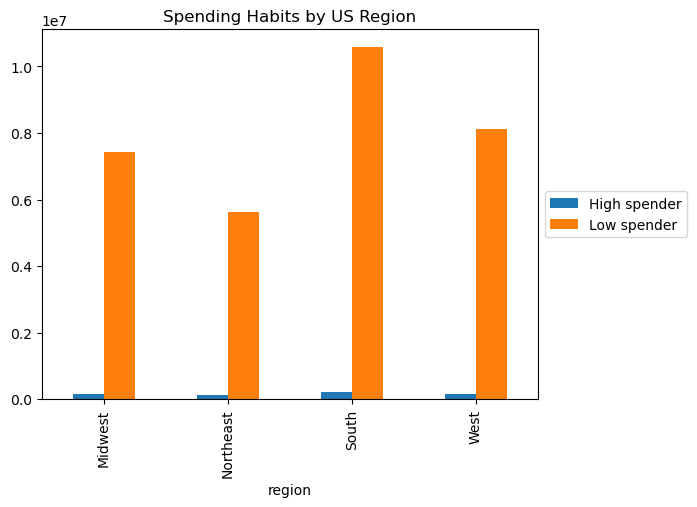

In [13]:
spending_habits_bar = spending_habits.plot.bar()
plt.title('Spending Habits by US Region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [14]:
#Export bar chart
spending_habits_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Spending Habits by US Region.png'),bbox_inches='tight')

# Q4 Create an exclusion flag for low-activity customers (customers with less than 5 orders) 

In [14]:
# Create customer activity column

orders_products_all.loc[orders_products_all['max_order']>=5,'customer_activity']='High_activity_customer'

In [15]:
orders_products_all.loc[orders_products_all['max_order']<5,'customer_activity']='Low_activity_customer'

In [16]:
# Check frequency

orders_products_all['customer_activity'].value_counts(dropna = False)

High_activity_customer    30964564
Low_activity_customer      1440295
Name: customer_activity, dtype: int64

In [17]:
# Create a subset for Low_activity_customers

low_active_customers = orders_products_all.loc[orders_products_all['customer_activity'] == 'Low_activity_customer']

In [21]:
# Export the low active customers

low_active_customers.to_pickle('../02 Data/Prepared Data/Low_activity_Customers.pkl')

In [22]:
orders_products_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404817
Data columns (total 34 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   user_id                int32   
 1   gender                 category
 2   state                  category
 3   age                    int8    
 4   date_joined            object  
 5   number_of_dependants   int8    
 6   family_status          category
 7   income                 int32   
 8   order_id               int32   
 9   order_number           int8    
 10  orders_day_of_week     int8    
 11  order_hour_of_day      int8    
 12  days_since_last_order  float16 
 13  first_order            category
 14  product_id             int32   
 15  add_to_cart_order      int8    
 16  reordered              int8    
 17  product_name           category
 18  aisle_id               int8    
 19  department_id          int8    
 20  prices                 float32 
 21  price_range_loc        catego

In [18]:
orders_products_all['region']=orders_products_all['region'].astype('category')
orders_products_all['customer_activity']=orders_products_all['customer_activity'].astype('category')

In [23]:
# Exclude low_activity_customer from the data

orders_products_all = orders_products_all.loc[orders_products_all ['customer_activity'] == 'High_activity_customer']

In [24]:
# Check frequency

orders_products_all['customer_activity'].value_counts(dropna = False)

High_activity_customer    30964564
Low_activity_customer            0
Name: customer_activity, dtype: int64

In [25]:
orders_products_all.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,order_number,...,busiest_period_of_day,max_order,loyalty_flag,average_prices,spending_flag,median_days,order_frequency_flag,_merge,region,customer_activity
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High_activity_customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High_activity_customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High_activity_customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High_activity_customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High_activity_customer


# Q5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

In [26]:
# check simple statestic for the variables age, income, and number of dependants
orders_products_all[['age', 'income', 'number_of_dependants']].describe().applymap('{:,.2f}'.format)

,age,income,number_of_dependants
count,"30,964,564.00","30,964,564.00","30,964,564.00"
mean,49.47,"99,675.87",1.50
std,18.49,"43,141.87",1.12
min,18.00,"25,903.00",0.00
25%,33.00,"67,292.00",1.00
50%,49.00,"96,765.00",2.00
75%,65.00,"128,102.00",3.00
max,81.00,"593,901.00",3.00


# Age Variable

In [31]:
# Create Age Profile by creating age flag
orders_products_all.loc[orders_products_all['age'] < 40,'age_category'] = 'young_adult'

In [28]:
orders_products_all.loc[orders_products_all['age'] >= 40 & (orders_products_all['age'] < 60), 'age_category'] = 'middle_aged_adult'

In [29]:
orders_products_all.loc[orders_products_all['age'] >= 60,'age_category']='old_adult'

In [32]:
# Check output

orders_products_all['age_category'].value_counts()

young_adult          10665110
old_adult            10574504
middle_aged_adult     9724950
Name: age_category, dtype: int64

# Income Variable

In [33]:
# Create Income Profile by creating income flag by destributing the income into three categories
orders_products_all.loc[orders_products_all['income']<70000, 'income_category'] = 'Low-income'

In [34]:
orders_products_all.loc[(orders_products_all['income']>=70000) & (orders_products_all['income']<=150000), 'income_category'] = 'Middle-income'

In [35]:
orders_products_all.loc[orders_products_all['income']>150000, 'income_category'] = 'High-income'

In [36]:
# Check output

orders_products_all['income_category'].value_counts()

Middle-income    18549497
Low-income        8520533
High-income       3894534
Name: income_category, dtype: int64

In [37]:
#Exporting orders_products_all dataframe due to lack of memory and will continue the task in 4.10.2
orders_products_all.to_pickle('../02 Data/Prepared Data/orders_products_all_4.10.1.pkl')